In [1]:

from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


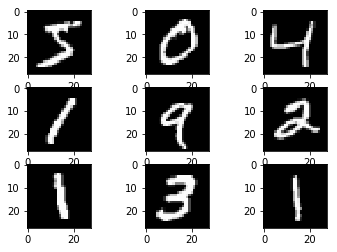

In [2]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [3]:

# load dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [4]:

# scale pixels
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm


In [5]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [6]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, trainacc = model.evaluate(trainX, trainY, verbose=0)
		_, testacc = model.evaluate(testX, testY, verbose=0)
		print('>Train Accuracy %.3f' % (trainacc * 100.0))
		print('>Test Accuracy %.3f' % (testacc * 100.0)) 
		scores.append(acc)
	return scores
 

In [7]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['acc'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
	pyplot.show()

In [8]:
# summarize model performance
def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	pyplot.boxplot(scores)
	pyplot.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 53s - loss: 0.1321 - acc: 0.9577 - val_loss: 0.0721 - val_acc: 0.9780
Epoch 2/10
 - 52s - loss: 0.0469 - acc: 0.9855 - val_loss: 0.0505 - val_acc: 0.9854
Epoch 3/10
 - 52s - loss: 0.0316 - acc: 0.9903 - val_loss: 0.0467 - val_acc: 0.9859
Epoch 4/10
 - 53s - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0419 - val_acc: 0.9882
Epoch 5/10
 - 52s - loss: 0.0177 - acc: 0.9940 - val_loss: 0.0442 - val_acc: 0.9875
Epoch 6/10
 - 52s - loss: 0.0111 - acc: 0.9965 - val_loss: 0.0431 - val_acc: 0.9888
Epoch 7/10
 - 52s - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0500 - val_acc: 0.9889
Epoch 8/10
 - 52s - loss: 0.0063 - acc: 0.9981 - val_loss: 0.0474 - val_acc: 0.9892
Epoch 9/10
 - 53s - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0501 - val_acc: 0.9878
Epoch 10/10
 - 53s - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0520 - val_a

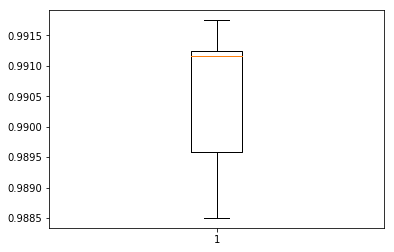

In [9]:
# run the model
def run_model():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores = evaluate_model(trainX, trainY)

	summarize_performance(scores)
 
#entry point
run_model()